## Notebook 4: LMS Linear Adaptive Filter Training
<b>Introduction to Soft Computing, Spring, 2018 <br>
Wright State University</b>

This notebook provides one implementation of LMS error correction learning for a simple linear adaptive filter.  
You may note that the comments are becoming less frequent and less detailed.  This is on purpose.  Many coding methods from previous notebooks are being reused here, and by now you should be sufficiently familiar with them to
be able to extract the meaning of the code yourself.


Inital Error 1.568966916508561
Final error after 40000 epochs of training = 1.8846087304175125


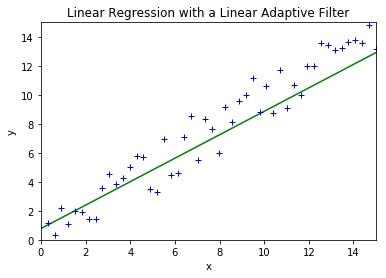

In [33]:
%matplotlib inline

import numpy as np
import math as math
import matplotlib.pyplot as plt
import random as random

def Mean_Squared_Error(Data_Points, W):
    # Start Error Count at Zero
    error = 0 
    for pair in Data_Points:
        y_predicted = np.dot(W, np.insert(pair[:-1],0,1))
        error += np.square(pair[1] - y_predicted)        
    return error / len(Data_Points)


random.seed()   # Seed the random number generator in the Python <random> package.

# Let's make a cloud of randomized data points for us to fit the line to. First we'll
# make two lists of points and then stack them into a single matrix of point pairs
X_points = np.linspace(0.0, 15.0, num = 50)
Y_points = [x + random.uniform(-2.0, 2.0) for x in X_points]
#Y_points = [x for x in X_points]
Points   = np.column_stack([X_points, Y_points])

# Now, let's make a random two-input linear adaptive filter by setting randomized 
# bias, weight_1, and weight_2 in a single weight vector.

W  =  np.array(np.random.rand(2))

# Set a learning rate.  Remember, both too large or too small a learning rate are bad.  Refer to lecture notes.

learning_rate = 0.005

print ('Inital Error {0}'.format(Mean_Squared_Error(Points,W)))

count = 0
while count < 40000:
    for pair in Points:
        y_predicted = np.dot(W, np.insert(pair[:-1],0,1))
        delta_W     = [x * (learning_rate * (pair[1]-y_predicted)) for x in np.insert(pair[:-1],0,1)] 
        W           = np.add(W,delta_W)
        #print W
    count +=1


print ('Final error after {0} epochs of training = {1}'.format(count,Mean_Squared_Error(Points,W)))
# Compute the regression line
X_regression = np.linspace(0.0, 15.0, num = 50)
Y_regression = [W[1]*x+W[0] for x in X_regression]
                       
# set up the conditions of the plot (title, lables, ranges, etc.)
plt.title('Linear Regression with a Linear Adaptive Filter')
plt.xlabel('x')
plt.ylabel('y')
plt.axis([0.0, 15.0, 0.0, 15.0])

plt.plot(X_regression, Y_regression, color='green')  # plot the separatrix
plt.plot(X_points, Y_points, marker='+', color = 'blue', ls='')  # plot the separatrix
plt.show()                                     # show the plot